### Lab -3 Regression
This is graded lab. Following packages will be used 

Numpy

scipy

sklearn

In [1]:
# The purpose of this lab is to learn a powerful ML package in python called scikit-learn.
# We will use their linear regression module in this lab and subsequently learn about more complex models implemented 
# in this package.

#Total points - 20

In [2]:
# In this lab, we will predict tensile strength, yield strength and elongation of steel given various process parameters
# The data was obtained from the following paper Ghuo S., etal (2018),'A predicting model for properties of steel using 
# the industrial big data based on machine learning'. The inputs are process parameters such as Furnace temperature, 
# Vanadium content, Annealing temperature etc. More details on the input features can be obtained through the above paper.

In [4]:
# Our task in this lab is to consider these input features and predict the tensile strength of steel.
# Let's start by importing necessary libraries.
import numpy as np 
from scipy.io import loadmat

#matplotlib is python package to create journal quality figures 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Helper function to load data
def loadData(filename):
	data = loadmat(filename)
	return data 

#dataDir = './SteelData/'
processedFile = 'processed_data.mat'
data = loadData(processedFile)
X = data['X']
Y = data['Y'][:,1].reshape(-1,1) # getting yield strength only

print("Shape of input features ",X.shape)
print("Shape of output ",Y.shape)

Shape of input features  (63162, 27)
Shape of output  (63162, 1)


In [79]:
# Ques 2.0 (1 point)

# Check the type of objects stored with variable name X and Y
# Hint - google python type
typeX = X.dtype # Enter your code here
typeY = Y.dtype # Enter your code here
print("Type of x ",typeX)
print("Type of y ", typeY)

Type of x  float64
Type of y  float64


In [82]:
#Ques 2.a (3 points)

# Its highly recommended to start your data science project with feature visualization and exploration.
# A common way is to plot histogram of each column of X and visulaize the underlying distributions.
# We can also compute correlation matrix and identify the features with high correlation. 
# The above methods work well when we have low dimensional data. (Imagine having histograms for 1000 features)

#Instead, we will compute different statistical quantities

#For each feature, compute its mean, maximum, minimum, median, mode and variance
#Hint - the above quantites can be computed with a single line of code
#       eg for mean - google numpy mean and pay attention to axis keyword

xMean = np.mean(X, axis = 0)
xMin = np.min(X, axis = 0)
xMax = np.max(X, axis = 0)
xMedian = np.median(X, axis = 0)

from scipy import stats
xMode = stats.mode(X, axis = 0)
xVar = np.var(X, axis = 0)

print("Mean of the feature vectors %.2f",xMean)
print("Min of the feature vectors ",xMin)
print("Max of the feature vectors ",xMax)
print("Median of the feature vectors ",xMedian)
print("Mode of the feature vectors ",xMode)
print("Var of the feature vectors ",xVar)

Mean of the feature vectors %.2f [1.20082784e+03 8.61542605e+02 5.93204332e+02 3.88305421e+00
 1.17302919e+03 6.64444761e-03 2.93571784e-02 1.00855847e-02
 6.27934011e-02 4.23886514e-03 9.52944809e-04 7.11571673e-03
 3.70315316e-02 3.42456002e-02 1.11670451e-02 4.01359995e-04
 1.55644850e-03 2.85646433e-03 1.80558405e-03 7.74538488e-04
 4.21283367e-04 1.97645703e-01 1.24391284e-01 1.19965486e-03
 2.80343973e-03 7.47006111e-04 6.33292169e-09]
Min of the feature vectors  [1.086e+03 6.100e+02 3.010e+02 1.500e+00 7.150e+02 1.000e-04 4.700e-03
 2.300e-03 1.000e-04 1.000e-04 0.000e+00 1.000e-04 4.300e-03 3.100e-03
 0.000e+00 0.000e+00 1.000e-04 1.600e-03 0.000e+00 1.000e-04 1.000e-04
 1.290e-02 7.800e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
Max of the feature vectors  [1.2810e+03 9.5400e+02 7.7100e+02 1.9000e+01 1.6300e+03 3.6000e-02
 4.4030e-01 4.8290e-01 1.1523e+00 5.1430e-01 1.9990e-01 6.4500e-02
 3.0750e-01 3.0670e-01 1.1300e-01 4.9000e-03 2.1400e-02 2.5100e-02
 3.5700e-01 1.3500e-02

In [28]:
# We can easily see that each feature vector is having significantly different statistical quantities
# Before applying any learning algorithm, its always good idea to standardize the dataset 
# One way to standardize is to have each feature as zero mean and unit variance, which is achieved by subtracting mean
# and dividing by variance

#Ques 2.b Normalize the input features (2 points)

X_Norm = (X - X.mean(axis = 0))/(X.std(axis = 0)) #Enter your code here.

#check that normalization worked
print(np.mean(X_Norm, axis = 0))
print(np.var(X_Norm, axis = 0))

[-4.58980774e-15  1.77832551e-15 -1.97991706e-16  1.58393365e-16
  4.28382055e-16 -8.99962301e-18 -3.23986428e-17  6.11974365e-17
 -4.67980397e-17 -1.79992460e-18 -3.14986805e-17 -1.29594571e-16
 -5.03978889e-17  5.03978889e-17  7.19969841e-17 -7.55968333e-17
 -1.19694986e-16 -4.53581000e-16 -2.96987559e-17  2.30390349e-16
 -3.95983412e-17 -9.53960039e-17  1.57999631e-16  2.87987936e-17
  6.16474176e-17  2.15990952e-17  1.12495288e-18]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


In [30]:
# Our main goal in machine learning is to get the model that generalizes well. In other words, we want a ML model that 
# does not overfit and gives good predictions for the inputs outside its training domain. 
# One way to achieve is to have a dedicated test set on which you measure the performance of your learning algorithm.
# Scikit-learn gives a convenient function to split your data into training and test set

from sklearn.model_selection import train_test_split


#Ques 2.c Use train_test_split function to have 80% Training set and 20% test set (2 points) 

X_train, X_test, y_train, y_test = train_test_split(X_Norm, Y, test_size = 0.2)

In [31]:
# Great -- Now we have training set + test set and we are ready to implement our first ML model
# We will start with linear model from Scikit-Learn or SKLearn.
# A linear regressor model can be imported using the following command
from sklearn.linear_model import LinearRegression

#Declare a linear regression model
linModel = LinearRegression() 

In [33]:
#Ques 2.d Use linModel to fit linear model on X_train and Y_train (3 points)
#Hint - google sklearn LinearRegression fit function 

reg = linModel.fit(X_train, y_train)

In [49]:
#Ques 2.e Evaluate your fit using score function or compute mean squared error (2 points)

from sklearn.metrics import mean_squared_error, r2_score

print('The R^2 is %.2f'%reg.score(X_train, y_train))




The R^2 is 0.94


The $R^2$ of 0.94 suggests a very good training fit . We have not yet evaluated the model on the test set yet, so it is not yet possible to say if the model is over fitted.

In [51]:
#Ques 2.f Make predictions on test set. This is the most crucial step in any data science project i.e. ability of your
# model to make good predictions on the data that your model hasn't seen. Error on test set can help you to decide
# between different models, hyperparameter selection (more in the coming labs). (3 points)

# use predict function to compute y_test_est
y_test_est = reg.predict(X_test)

#compute mean squared error
err_test = mean_squared_error(y_test, y_test_est)
err_r = r2_score(y_test, y_test_est)

print('Mean squared error: %.2f'%err_test)
print('R2 test error: %.2f'%err_r)

Mean squared error: 927.44
R2 test error: 0.94


In [57]:
len(y_test_est)

12633

Text(0.5, 1.0, 'Estimated vs actual y-values')

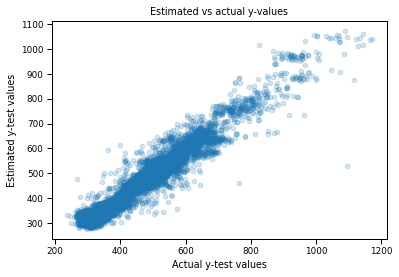

In [75]:
#Ques 2.g (4 points)

#Use matplotlib or any other plotting library of your choice to plot y_test vs y_test_est
# Label the axes accordingly

import seaborn as sns

sns.set_context('paper', rc = {'sans-serif':'Helvetica-Neue'})

fig, ax = plt.subplots(1, 1)

plt.scatter(y_test, y_test_est, alpha = 0.2)

plt.xlabel('Actual y-test values')
plt.ylabel('Estimated y-test values')
plt.title('Estimated vs actual y-values')

The strong linear relationship between the estimate and actual y-values suggests that model is appropiated. Additionally, this linear relationship holds across the range of y-values, further implying that the model is good across the whole range of data